# 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/BDA/data/모델링/train_mean.csv')
test_df = pd.read_csv('/content/drive/MyDrive/BDA/data/모델링/test_mean.csv')

In [5]:
train = train_df.copy()
test = test_df.copy()

In [ ]:
train

,방문 지역,지출 비용,철도비,도로비,식음료비,음식점비,쇼핑비,여행 일수,숙박비,교통비,여행 활동비,자가용 의존도,교통인프라지수
0,11010,188737.500000,16338.157895,12750.000000,15074.626866,58697.268657,29552.238806,0.567164,19417.910448,46732.894737,8432.835821,0.178218,1.423597
1,11020,214134.139535,20353.488372,13018.604651,16385.714286,55505.771429,66565.714286,0.257143,9142.857143,58441.883721,4571.428571,0.327586,1.696777
2,11030,211063.360000,27440.000000,5608.000000,5456.521739,75782.608696,11469.565217,0.739130,23086.956522,64528.040000,9434.782609,0.354839,1.328858
3,11040,86000.000000,5375.000000,12750.000000,31200.000000,79000.000000,0.000000,0.200000,0.000000,33125.000000,3000.000000,0.277778,0.777908
4,11050,157083.333333,6500.000000,8000.000000,13200.000000,75400.000000,5000.000000,0.400000,14000.000000,60333.333333,4400.000000,0.100000,1.065124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,38380,165470.588235,0.000000,0.000000,16235.294118,43470.588235,8235.294118,0.647059,41470.470588,31764.823529,1705.882353,0.882353,-0.527081
220,38390,91000.000000,0.000000,227.272727,19476.190476,57238.095238,476.190476,0.476190,52952.190476,33591.090909,4523.809524,0.904762,-0.503720
221,38400,87733.333333,333.333333,666.666667,9966.666667,36333.333333,0.000000,0.333333,8000.000000,18433.333333,2533.333333,0.857143,-0.547880
222,39010,629508.987328,354.804646,3753.959873,35297.967778,181592.471111,46560.000000,2.077778,116483.343333,218747.111932,23227.384444,0.090116,0.088387


In [ ]:
test

,방문 지역,지출 비용,철도비,도로비,식음료비,음식점비,쇼핑비,여행 일수,숙박비,교통비,여행 활동비,자가용 의존도,교통인프라지수
0,11010,200468.536082,18348.453608,5065.969072,8886.577320,75855.639175,24247.422680,0.628866,33814.432990,60703.082474,12164.948454,0.178218,1.423597
1,11020,233187.500000,21937.500000,7531.250000,3812.500000,80062.500000,30156.250000,0.812500,27187.500000,65593.750000,10593.750000,0.327586,1.696777
2,11030,200820.000000,13560.000000,15200.000000,3840.000000,76720.000000,11200.000000,0.640000,14400.000000,65880.000000,17040.000000,0.354839,1.328858
3,11040,99443.181818,3454.545455,14045.454545,4386.363636,46045.454545,10409.090909,0.181818,13181.818182,30318.181818,5454.545455,0.277778,0.777908
4,11050,130757.142857,7928.571429,11285.714286,5907.142857,51142.857143,11785.714286,0.500000,22857.142857,51842.857143,13357.142857,0.100000,1.065124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,38380,88474.153846,0.000000,2692.307692,15384.307692,65115.230769,1538.461538,0.461538,41538.461538,37384.615385,3461.384615,0.882353,-0.527081
221,38390,84850.000000,0.000000,333.333333,13600.000000,35500.000000,600.000000,0.400000,40666.666667,27466.866667,3233.333333,0.904762,-0.503720
222,38400,98470.285714,0.000000,714.285714,9392.892857,28821.428571,6071.428571,0.357143,14285.714286,21017.857143,4035.714286,0.857143,-0.547880
223,39010,603497.156841,652.502781,3013.355951,39895.927697,238748.655172,45973.301446,1.875417,105489.451613,274218.696329,36146.828699,0.090116,0.088387


# 결측치 처리

결측치 모두 0으로 대체

In [6]:
train = train.fillna(0)
test = test.fillna(0)

# 로그 변환

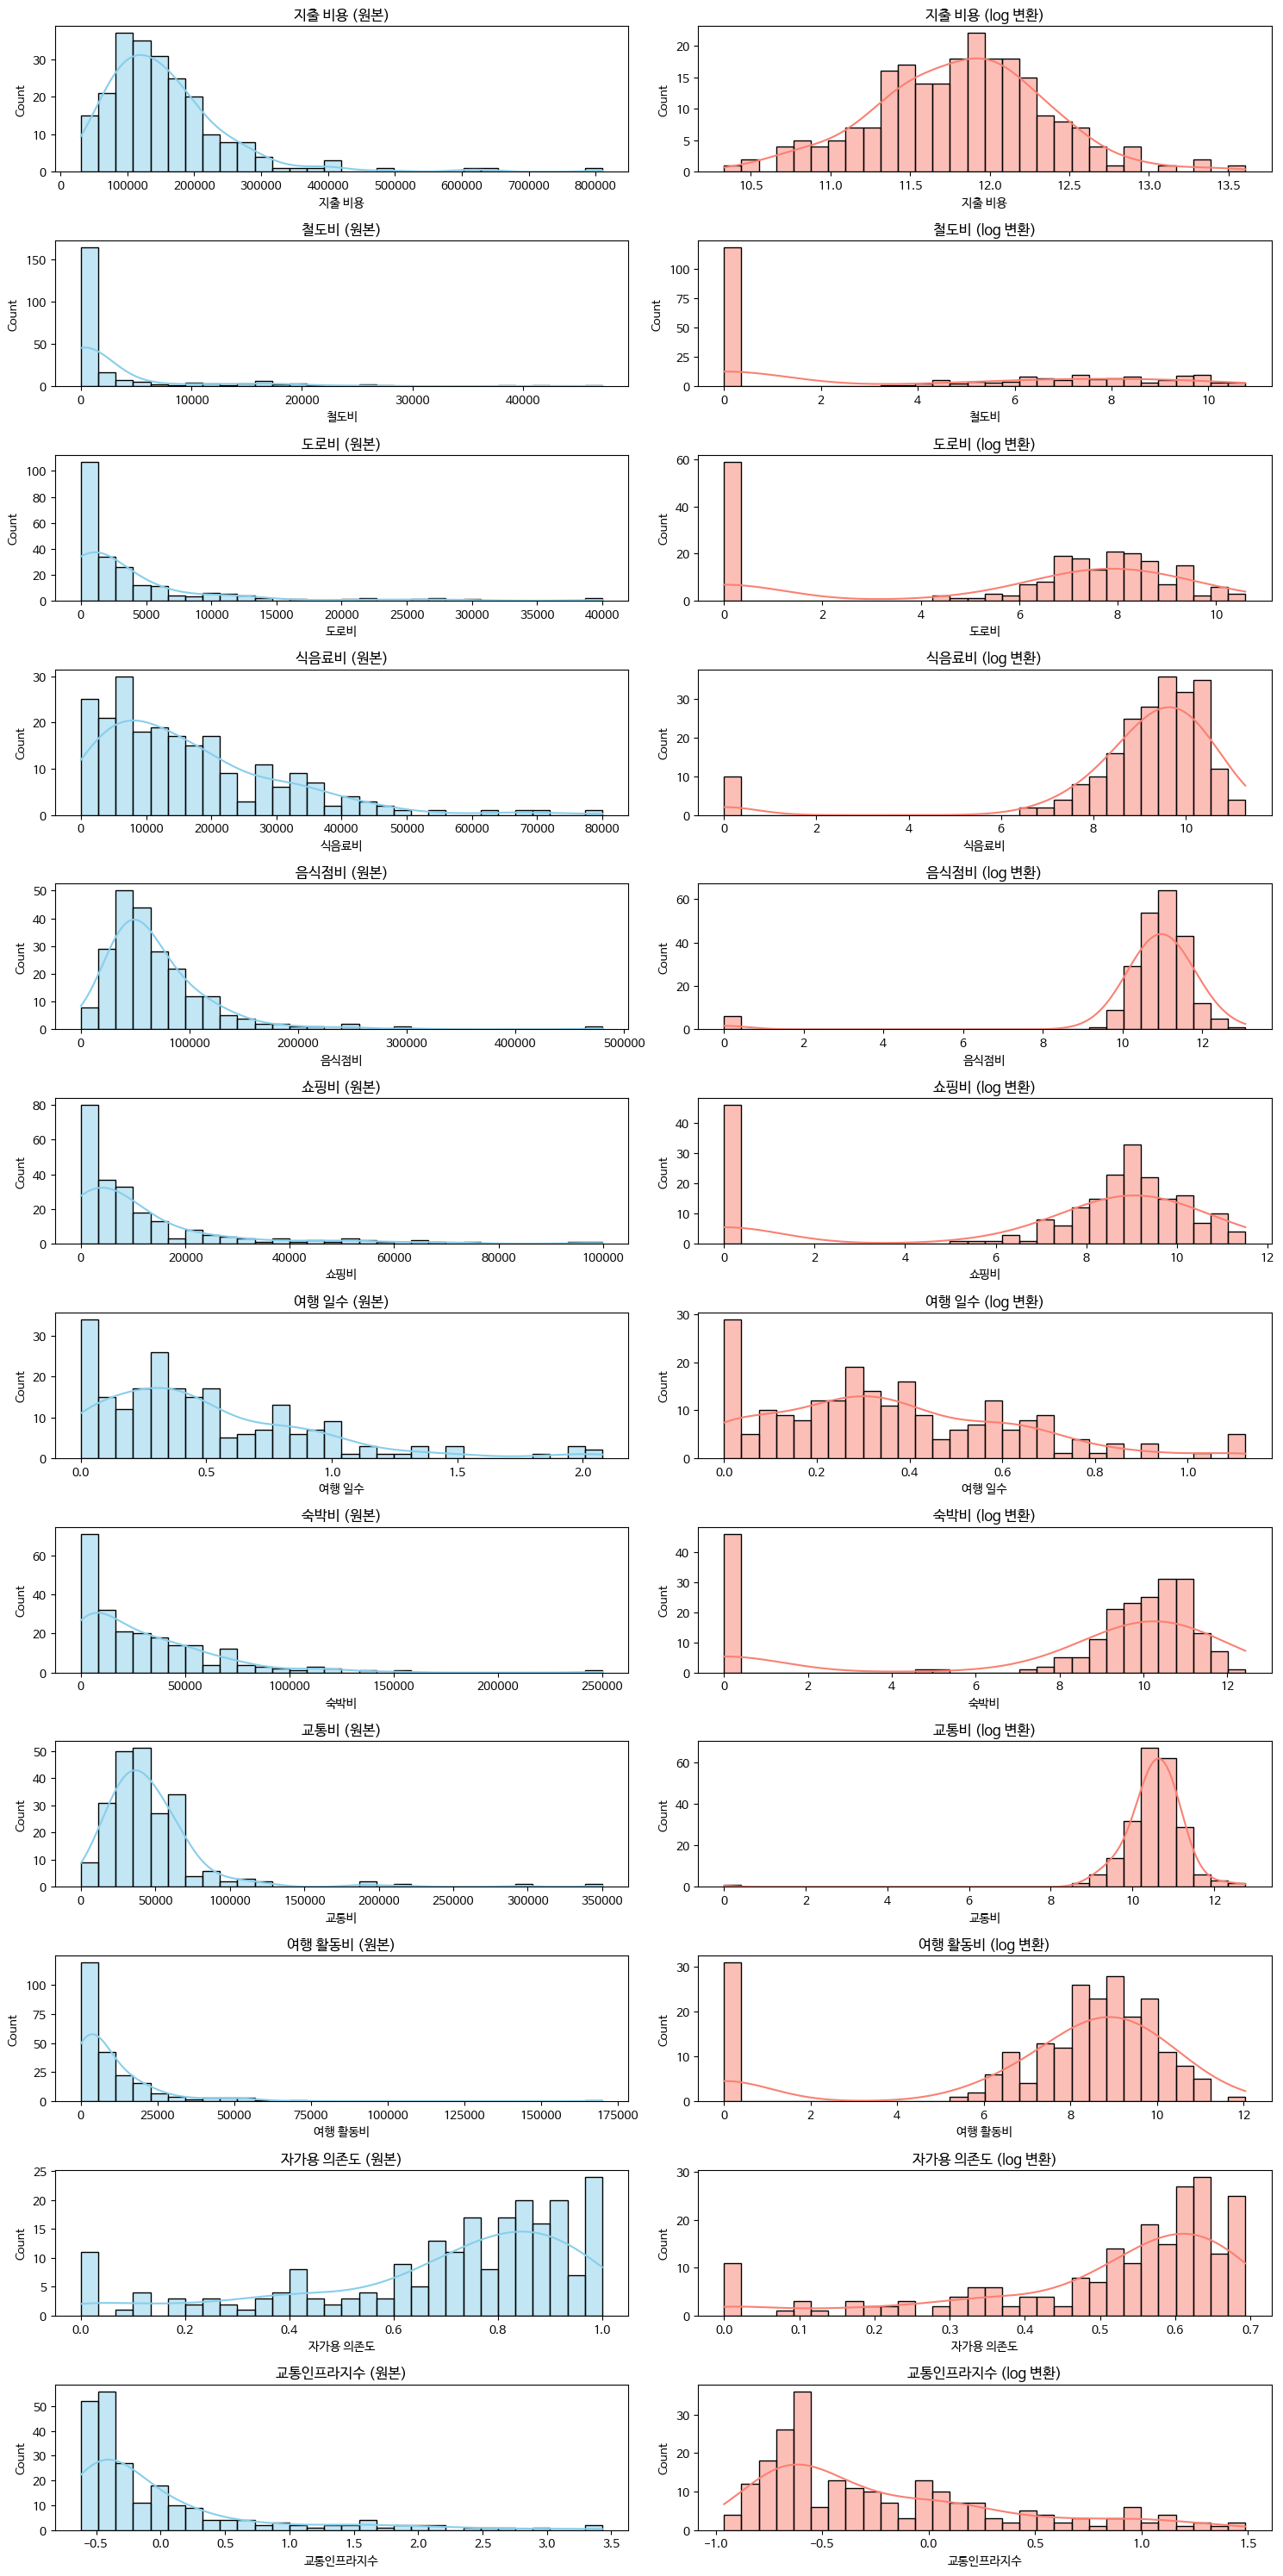

In [ ]:
cols = train.columns.tolist()[1:]

plt.figure(figsize=(15, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 2, 2*i + 1)
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} (원본)')

    plt.subplot(len(cols), 2, 2*i + 2)
    sns.histplot(np.log1p(train[col]), kde=True, bins=30, color='salmon')
    plt.title(f'{col} (log 변환)')

plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = train.select_dtypes(include='number').drop(columns=['방문 지역'])
skewness = numeric_cols.skew().sort_values(ascending=False)

print("변수별 왜도:")
print(skewness)

변수별 왜도:
여행 활동비     5.075828
교통비        4.249333
철도비        3.331217
도로비        3.250757
음식점비       3.194623
지출 비용      2.692972
쇼핑비        2.615622
숙박비        2.207888
교통인프라지수    2.200837
식음료비       1.435697
여행 일수      1.405679
자가용 의존도   -1.137791
dtype: float64


In [ ]:
# for col in numeric_cols:
#     train[col] = np.log1p(train[col])
#     test[col] = np.log1p(test[col])

# numeric_cols = train.select_dtypes(include='number')
# skewness_after = numeric_cols.skew().sort_values(ascending=False)

# print("변수별 왜도:")
# print(skewness_after)

변수별 왜도:
교통인프라지수    1.073418
여행 일수      0.649271
철도비        0.374309
지출 비용      0.054216
도로비       -0.811307
방문 지역     -1.093081
쇼핑비       -1.206408
숙박비       -1.288365
자가용 의존도   -1.462187
여행 활동비    -1.594071
식음료비      -3.265416
음식점비      -4.994468
교통비       -6.358888
dtype: float64


In [7]:
log_cols = ['지출 비용', '철도비', '도로비', '쇼핑비', '숙박비', '여행 활동비', '교통인프라지수', '여행 일수', '자가용 의존도']

for col in log_cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

# 스케일링

In [8]:
cols = train.columns.tolist()[2:]

ss = StandardScaler()

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[cols] = ss.fit_transform(train[cols])
test_scaled[cols] = ss.transform(test[cols])

# LabelEncoding

In [9]:
le = LabelEncoder()

train_scaled['방문 지역'] = le.fit_transform(train_scaled['방문 지역'])

test_scaled = test_scaled[test_scaled['방문 지역'].isin(le.classes_)]  # 알 수 없는 지역 제거
test_scaled['방문 지역'] = le.transform(test_scaled['방문 지역'])

/tmp/ipython-input-9-2377876174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled['방문 지역'] = le.transform(test_scaled['방문 지역'])


# X, y 분리

In [10]:
X = train_scaled.drop('지출 비용', axis=1)
y = train_scaled['지출 비용']

In [11]:
test_ = test_scaled.drop('지출 비용', axis=1)
test_y = np.expm1(test_scaled['지출 비용'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# 모델링

## XGBoost

In [13]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01,
                   max_depth=4, random_state=156)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² (설명력): {r2:.4f}")

RMSE: 0.2601
MAE: 0.1750
R² (설명력): 0.7046


/tmp/ipython-input-26-216171890.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

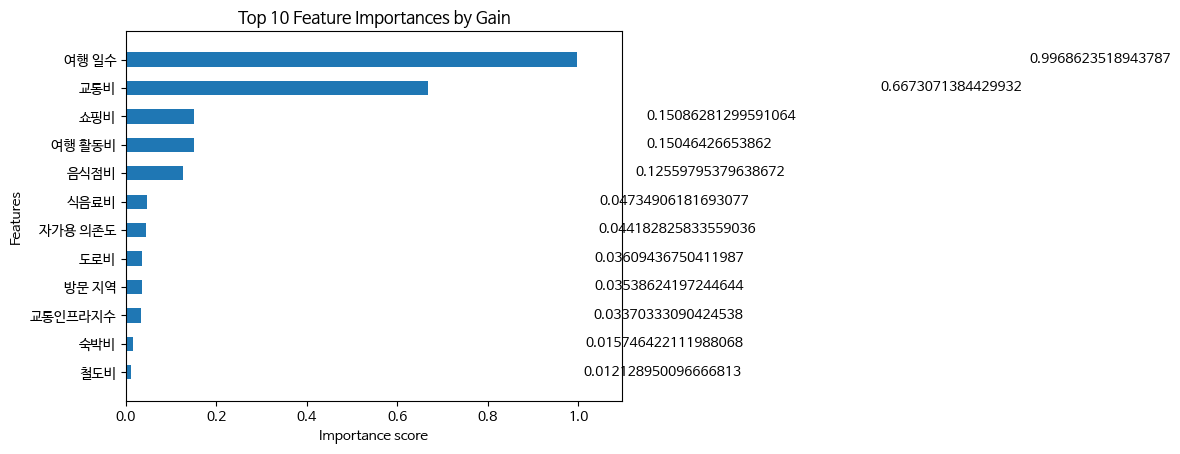

In [ ]:
plt.figure(figsize=(10, 6))
plot_importance(xgb,
                importance_type='gain',
                height=0.5,
                grid=False
                )

plt.title("Top 10 Feature Importances by Gain")
plt.tight_layout()
plt.show()

#### test 데이터 예측

In [15]:
xgb.fit(X, y)
pred_test = xgb.predict(test_)
real_pred = np.expm1(pred_test)

In [16]:
mse = mean_squared_error(test_y, real_pred)
mae = mean_absolute_error(test_y, real_pred)
r2 = r2_score(test_y, real_pred)

print(f"RMSE: {np.sqrt(mse):,.4f}")
print(f"MAE: {mae:,.4f}")
print(f"R^2 score: {r2:.4f}")

RMSE: 42,864.7702
MAE: 25,792.3685
R^2 score: 0.7783


In [17]:
print(f'test 데이터로 예측한 총 소비액: {real_pred.sum():,.4f}')
print(f'test 데이터의 실제 총 소비액: {test_y.sum():,.4f}')

test 데이터로 예측한 총 소비액: 33,674,840.0000
test 데이터의 실제 총 소비액: 33,540,392.2432


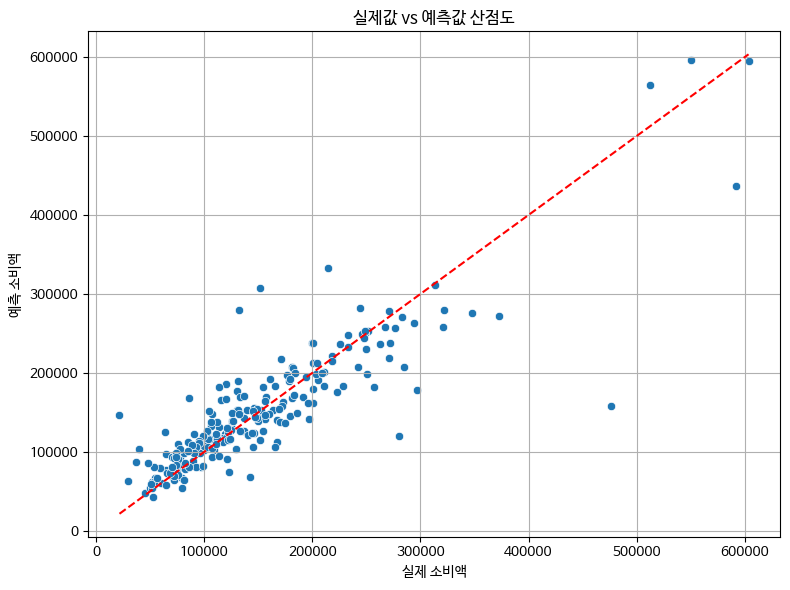

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_y, y=real_pred)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')  # y=x 기준선
plt.xlabel("실제 소비액")
plt.ylabel("예측 소비액")
plt.title("실제값 vs 예측값 산점도")
# plt.xlim(0, 2*1e+8) # 이상치 제외 시각화
plt.grid(True)
plt.tight_layout()
plt.show()

#### 제출파일 생성

In [ ]:
sub = pd.DataFrame({
    '방문 지역': test_['방문 지역'],
    '예측 지출액': real_pred
})

In [ ]:
sub['방문 지역'] = le.inverse_transform(sub['방문 지역'])

In [ ]:
sub

,방문 지역,예측 지출액
0,11010,162469.062500
1,11020,232245.718750
2,11030,212194.562500
3,11040,112073.039062
4,11050,153069.953125
...,...,...
220,38380,108514.812500
221,38390,101079.656250
222,38400,81778.968750
223,39010,595610.125000


In [ ]:
sub.to_csv('교통 인프라 지수 증가 전 총 예측 지출액.csv', index=False)